# Model exploration

In this notebook we explore how our different model components work.

In [4]:
DATA_PATH = 'data/'

## Image-to-text

In [1]:
from transformers import pipeline

# create image_to_text model
image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
c:\Users\lukas\miniconda3\envs\nlp_venv\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


### Local images

In [7]:
text = image_to_text(DATA_PATH+"poem_images/0.jpg")[0]["generated_text"]
print("Description: ", text)

c:\Users\lukas\miniconda3\envs\nlp_venv\lib\site-packages\transformers\generation\utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Description:  two pink flowers in a flower pot 


### Online images

Instead of a local path we can also pass an online image URL to the `image_to_text` function.

In [8]:
text = image_to_text("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2F3.bp.blogspot.com%2F-2pq1tT_bwRQ%2FUSMp_PHAjtI%2FAAAAAAAAThM%2FPX2H_FV13w4%2Fs1600%2FMaple%2BPoetic%2BWallpaper.jpg&f=1&nofb=1&ipt=efde060abd000da0e74c17c7171a6a56909b67445a355f7e04afe2f094360b36&ipo=images")
text = text[0]["generated_text"]
print("Description: ", text)

c:\Users\lukas\miniconda3\envs\nlp_venv\lib\site-packages\transformers\generation\utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Description:  [{'generated_text': 'a painting of a flower arrangement in a flowery sky '}]


### Multiple images

We can give the model a list of images to caption. The model will then caption each image individually.

In [6]:
texts = image_to_text([DATA_PATH+"poem_images/0.jpg", DATA_PATH+"poem_images/3.jpg"])
descriptions = [text[0]["generated_text"] for text in texts]
print("Descriptions: ", descriptions)

c:\Users\lukas\miniconda3\envs\nlp_venv\lib\site-packages\transformers\generation\utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Descriptions:  ['two pink flowers in a flower pot ', 'a row of boats sitting on a dock ']


## Language model - GPT-2

In [2]:
from image_to_poem.language_model.gpt2 import GPT2Model

model_dir = "models/language_models/max_len-500/model/"

model = GPT2Model(model_dir)

poems = model.generate(num_return_sequences=3)


for i, poem in enumerate(poems):
    print("-"*10 + f"Poem {i+1}" + "-"*10)
    print(poem)
    print()
    

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


----------Poem 1----------
The river of the blue
Loud and clear and deep in nature
But not even within this deep blue sky
The river of the blue
Flowing down, up and down
And like a rose it floats high above
It's where I came from, up there and down
It's where I'll always come from
It's where I'll always be
It's where I'll always be
It's where I'll always be
And my love for you will always

----------Poem 2----------
The moon, the sea, you are always the sea
that is the mother of me
and I am the sea that you are,
the sea of the sea that tells
where is your sea?
I am the sea that is the mother
of me.

----------Poem 3----------
In the end I am a
little woman
and the woman
who
perches on
myself
and cries
and
sounds
like
a pretty butterfly
and
myself
sounds
like a little frog
and my self
sounds like a little dove
and my self
sounds like a little dove
and my own
sounds like a little dove
and my own self
sounds like a little dove
and my own self



In [4]:
model.__dict__

{'pretrained_model': '../models/language_models/model_20231123_225612/model/',
 'device': device(type='cuda'),
 'verbose': False,
 'name': 'model_20231128_113131',
 'tokenizer': GPT2Tokenizer(name_or_path='../models/language_models/model_20231123_225612/model/', vocab_size=50257, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|startoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|pad|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
 	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
 	50257: AddedToken("<|startoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
 	50258: AddedToken("<|pad|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
 },
 'model': GPT2LMHeadModel(
   (transformer): GPT2Model(
     (wte): Embedding(50259, 768)
   

In [9]:
model.generate(prompt="this is a cat")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[" and I am a man in my day\n\nMy own father died alone I'm alone\n and I'm not.\nWho was an angel?\nAll my own\nDon't know\n I am\nThe end all of my soul, no soul.\nThat day I was brokenMy dreamAnd I'm not a thing\n\nMy family, I need a day; I'm alone, the shadow, the dark that is her\nMy father, I cannot make me"]

In [14]:
num_params = 0

params = [param for param in model.model.parameters()]

len(params)

148

## Similarity model

In [1]:
from image_to_poem.language_model.gpt2 import GPT2Model

model_dir = "models/language_models/max_len-500/model/"
model = GPT2Model(model_dir)
prompt = "some lovely flowers in a field"
poems = model.generate(prompt = prompt, num_return_sequences=3, max_length=50)

for i, poem in enumerate(poems):
    print("-"*10 + f"Poem {i+1}" + "-"*10)
    print(poem)
    print()

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


----------Poem 1----------
,
Which you can't see, but smell and smell;
Your eyes are not blinded by those green grass;
The colour of your eyes, is what is most dear
To you, when your eyes are

----------Poem 2----------
,
The sun is a joy to our children;
The trees are a garden to them,
The sky a colorful sky.
To my children it is so beautiful,
To my love they are full of

----------Poem 3----------

near me
when we are alone
and i am alone
and when we have talked
one evening
i am happy
but i don’t remember
which time
we were sitting by the fire



In [2]:
from image_to_poem.similarity.similarity_scoring import BertSimilarityModel

sim_model = BertSimilarityModel.from_model_dir("models/similarity/model_20231129_221129")

for poem in poems:
    print(sim_model.similarity(prompt, poem))

0.8020926117897034
0.7550157308578491
0.5642459988594055


## Poem generator

In [8]:
from image_to_poem.poem_generator import PoemGenerator
import matplotlib.pyplot as plt
import json
from PIL import Image

poem_generator = PoemGenerator(lm_model = "models/language_models/max_len-400/model/")
    
# generate poems from images
poems = poem_generator.image_to_poem([DATA_PATH+"poem_images/1.jpg", DATA_PATH+"poem_images/3.jpg"])

Initializing image-to-text model...


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/work1/s183920/nlp/nlp_venv/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Initializing language model...


/work1/s183920/nlp/nlp_venv/lib/python3.10/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [9]:
poems

[{'image_path': 'data/poem_images/1.jpg',
  'image_desc': 'a flower arrangement in a vase with other flowers ',
  'generated_poem': ' in  a garden\nwhere the petals spread but the petals have disappeared\nfor an hour of time and then the vase opens\nlooking for the flowers for all to see\nand for the butterflies to pass away\nsomehow the vase is now closed before the flowers open\nthey are the same to the eye\nthe vase is hidden by the petals\nwhere the flower arrangement lies between the flowers\nwhile the butterfly'},
 {'image_path': 'data/poem_images/3.jpg',
  'image_desc': 'a row of boats sitting on a dock ',
  'generated_poem': '\non the upper deck of a sailing ship\nat sea\non the edge of a blue blue ocean\nunder an expanse of water\nthe bottom of a blue ocean.\na tiny island is off the island\nand a small island called "Sw"\nthe length of a sea island\na little ship stands on the shore\nand a small island called "N" stands on the water.\nThe first row is a picture of the'}]

Image ID: 1
Image URL: https://farm8.staticflickr.com/7434/10024691123_ba6ba177c6.jpg
Image caption: a flower arrangement in a vase with other flowers 


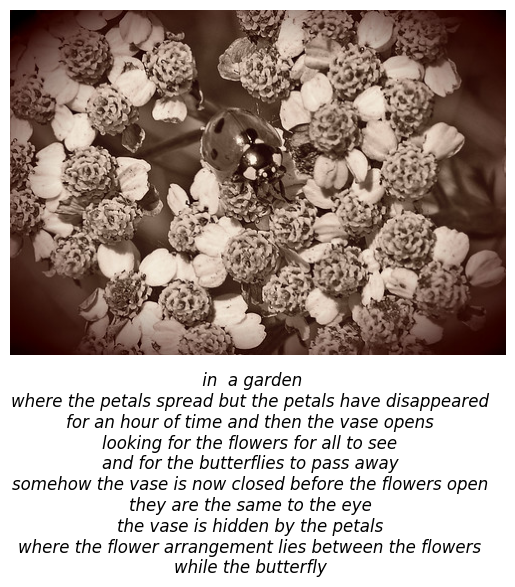

Image ID: 3
Image URL: https://farm2.staticflickr.com/1034/1002997433_0ab78b483e.jpg
Image caption: a row of boats sitting on a dock 


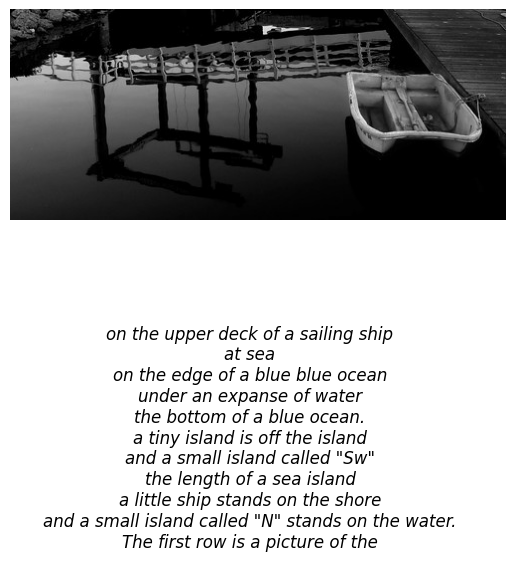

In [10]:
# load image json
image_json = json.load(open(DATA_PATH+"multim_poem.json"))

# choose random image
idxs = [1, 3]

for i, idx in enumerate(idxs):
    # extract from generation
    poem = poems[i]["generated_poem"]
    image_path = poems[i]["image_path"]
    desc = poems[i]["image_desc"]
    
    # print info
    print("Image ID:", image_json[idx]["id"])
    print("Image URL:", image_json[idx]["image_url"])
    print("Image caption:", desc)

    # display image
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')

    y_text = 0.1 if img.size[0] > img.size[1] else img.size[0]/img.size[1]*0.1
    plt.figtext(0.5, y_text, poem, horizontalalignment='center', fontsize=12, verticalalignment ="top", style ="italic", wrap=True)
    # plt.figtext(0.5, y_text, image_json[idx]["poem"], horizontalalignment='center', fontsize=12, verticalalignment ="top", style ="italic", wrap=True)

    plt.show()

### Playing with parameters

Differenet parameters can be set when generating the poem. These parameters are passed on to the `generate()` method for the GPT-2 language model. See [this blog](https://huggingface.co/blog/how-to-generate) for what parameters are available.

In [6]:
img_idx = 3

poem_out = poem_generator.image_to_poem(
    [f"../data/poem_images/{img_idx}.jpg"], 
    # max_new_tokens=40,
    # num_beams=5,
    no_repeat_ngram_size=2,
    # early_stopping=True,
    # top_k=0,
    # temperature=0.6,
)



C:\Users\lukas\AppData\Roaming\Python\Python310\site-packages\transformers\generation\utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Image ID: 3
Image URL: https://farm2.staticflickr.com/1034/1002997433_0ab78b483e.jpg
Image caption: a row of boats sitting on a dock 


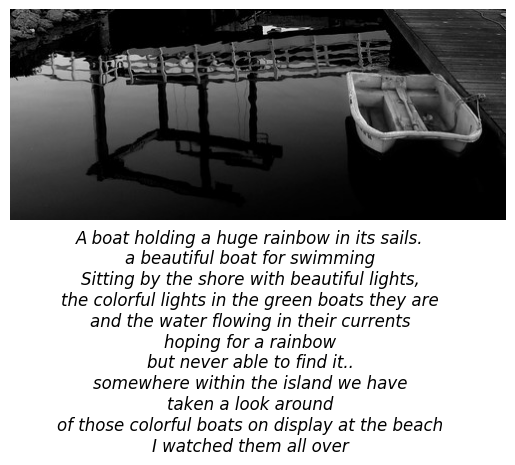

In [10]:
# extract from generation
poem = poem_out[0]["generated_poem"]
image_path = poem_out[0]["image_path"]
desc = poem_out[0]["image_desc"]

# print info
print("Image ID:", image_json[img_idx]["id"])
print("Image URL:", image_json[img_idx]["image_url"])
print("Image caption:", desc)

# display image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')

y_text = 0.1 if img.size[0] > img.size[1] else img.size[0]/img.size[1]*0.1
plt.figtext(0.5, .3, poem, horizontalalignment='center', fontsize=12, verticalalignment ="top", style ="italic", wrap=True)
# plt.figtext(0.5, y_text, image_json[idx]["poem"], horizontalalignment='center', fontsize=12, verticalalignment ="top", style ="italic", wrap=True)

plt.show()